# CFM Data Exploration Analysis - JP

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import MeCab

from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import sys

pd.set_option('max_colwidth', 800)

## 1. Load and Process Data

In [2]:
with open('./clean_data/JP_comments_clean.pkl', 'rb') as pickle_file:
    jp_df = pickle.load(pickle_file)

## 2. Visualization

In [3]:
# check the combined df info
jp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50544 entries, 0 to 11058
Data columns (total 3 columns):
tokenized          50544 non-null object
label              50544 non-null int64
init_totalwords    50544 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [4]:
jp_df.head()

tokenized  \
0                                                         最悪 商品 購入 一 週間 たた 発火 し   
1                                                                       使用 発火 し   
2                                                             USB コネクター 部分 発火 し   
3  ブレーカー 落とし 電球 交換 し スイッチ 入れ 爆発 し めちゃくちゃ 怖かっ 後 冷え 外し 元々 点け い 電球 取り付け 普通 経験 はじめて   
5    車載 充電 し 使用 し い 運転 発火 し たまたま 止まっ い 問題 なかっ 動い いる 時 あれ 事故 つながっ い br 返金 し いただき   

   label  init_totalwords  
0      1               32  
1      1               10  
2      1               19  
3      1              112  
5      1               95

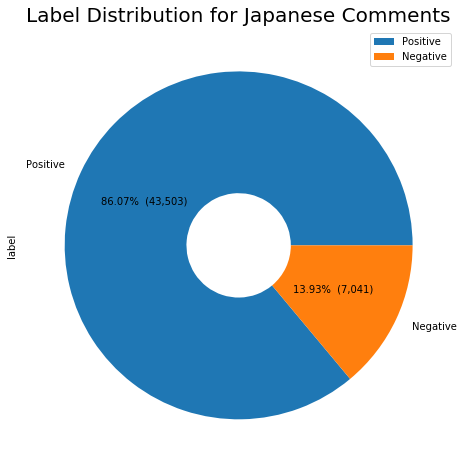

In [5]:

plt.figure(figsize=(10,8))
plt.title('Label Distribution for Japanese Comments', fontsize=20)
jp_df.label.value_counts().plot(kind='pie', 
                                labels = ['Positive', 'Negative'],
                                wedgeprops=dict(width=.7), 
                                autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p*sum(jp_df.label.value_counts())/100), 
                                startangle= 0 ,
                                legend = True, 
                                textprops={'fontsize': 10})
plt.legend(loc="upper right")
plt.show()

In [6]:
# length of the comments
jp_df['comments_len'] = jp_df['tokenized'].astype(str).apply(len)

# word count for the comments
jp_df['word_count'] = jp_df['tokenized'].apply(lambda x: len(str(x).split()))

jp_df.head()

tokenized  \
0                                                         最悪 商品 購入 一 週間 たた 発火 し   
1                                                                       使用 発火 し   
2                                                             USB コネクター 部分 発火 し   
3  ブレーカー 落とし 電球 交換 し スイッチ 入れ 爆発 し めちゃくちゃ 怖かっ 後 冷え 外し 元々 点け い 電球 取り付け 普通 経験 はじめて   
5    車載 充電 し 使用 し い 運転 発火 し たまたま 止まっ い 問題 なかっ 動い いる 時 あれ 事故 つながっ い br 返金 し いただき   

   label  init_totalwords  comments_len  word_count  
0      1               32            21           8  
1      1               10             7           3  
2      1               19            17           5  
3      1              112            76          22  
5      1               95            74          25

### Count of Letters in Comments

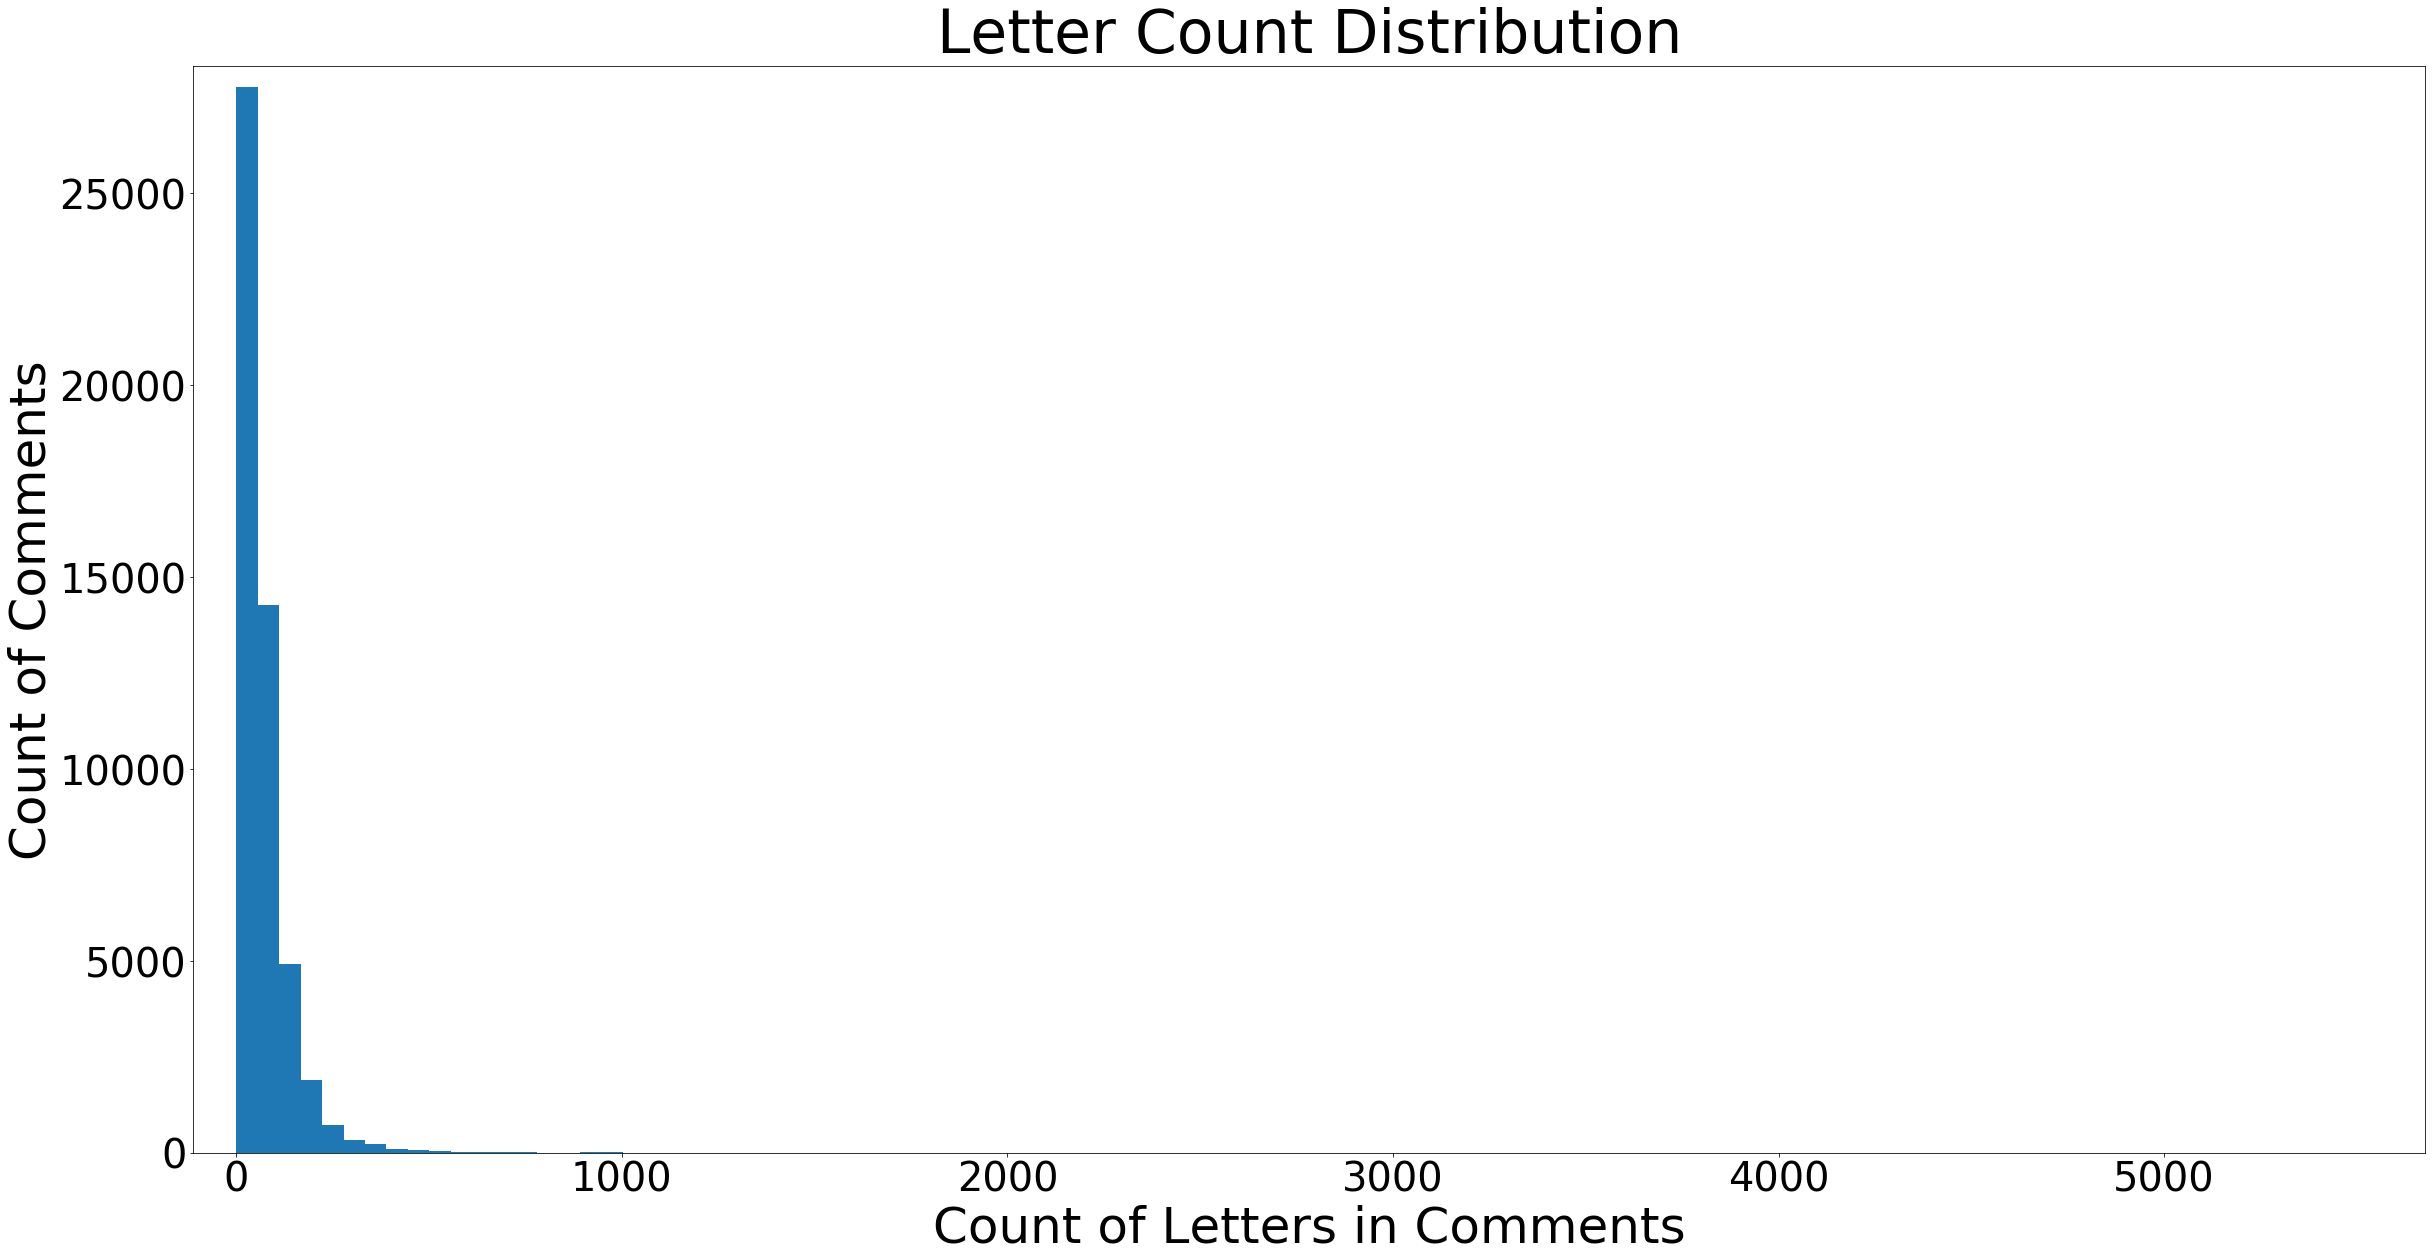

In [7]:
plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.xlabel('Count of Letters in Comments', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Count of Comments', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(jp_df['comments_len'], bins=100)
plt.title('Letter Count Distribution', fontsize=60)
plt.show()

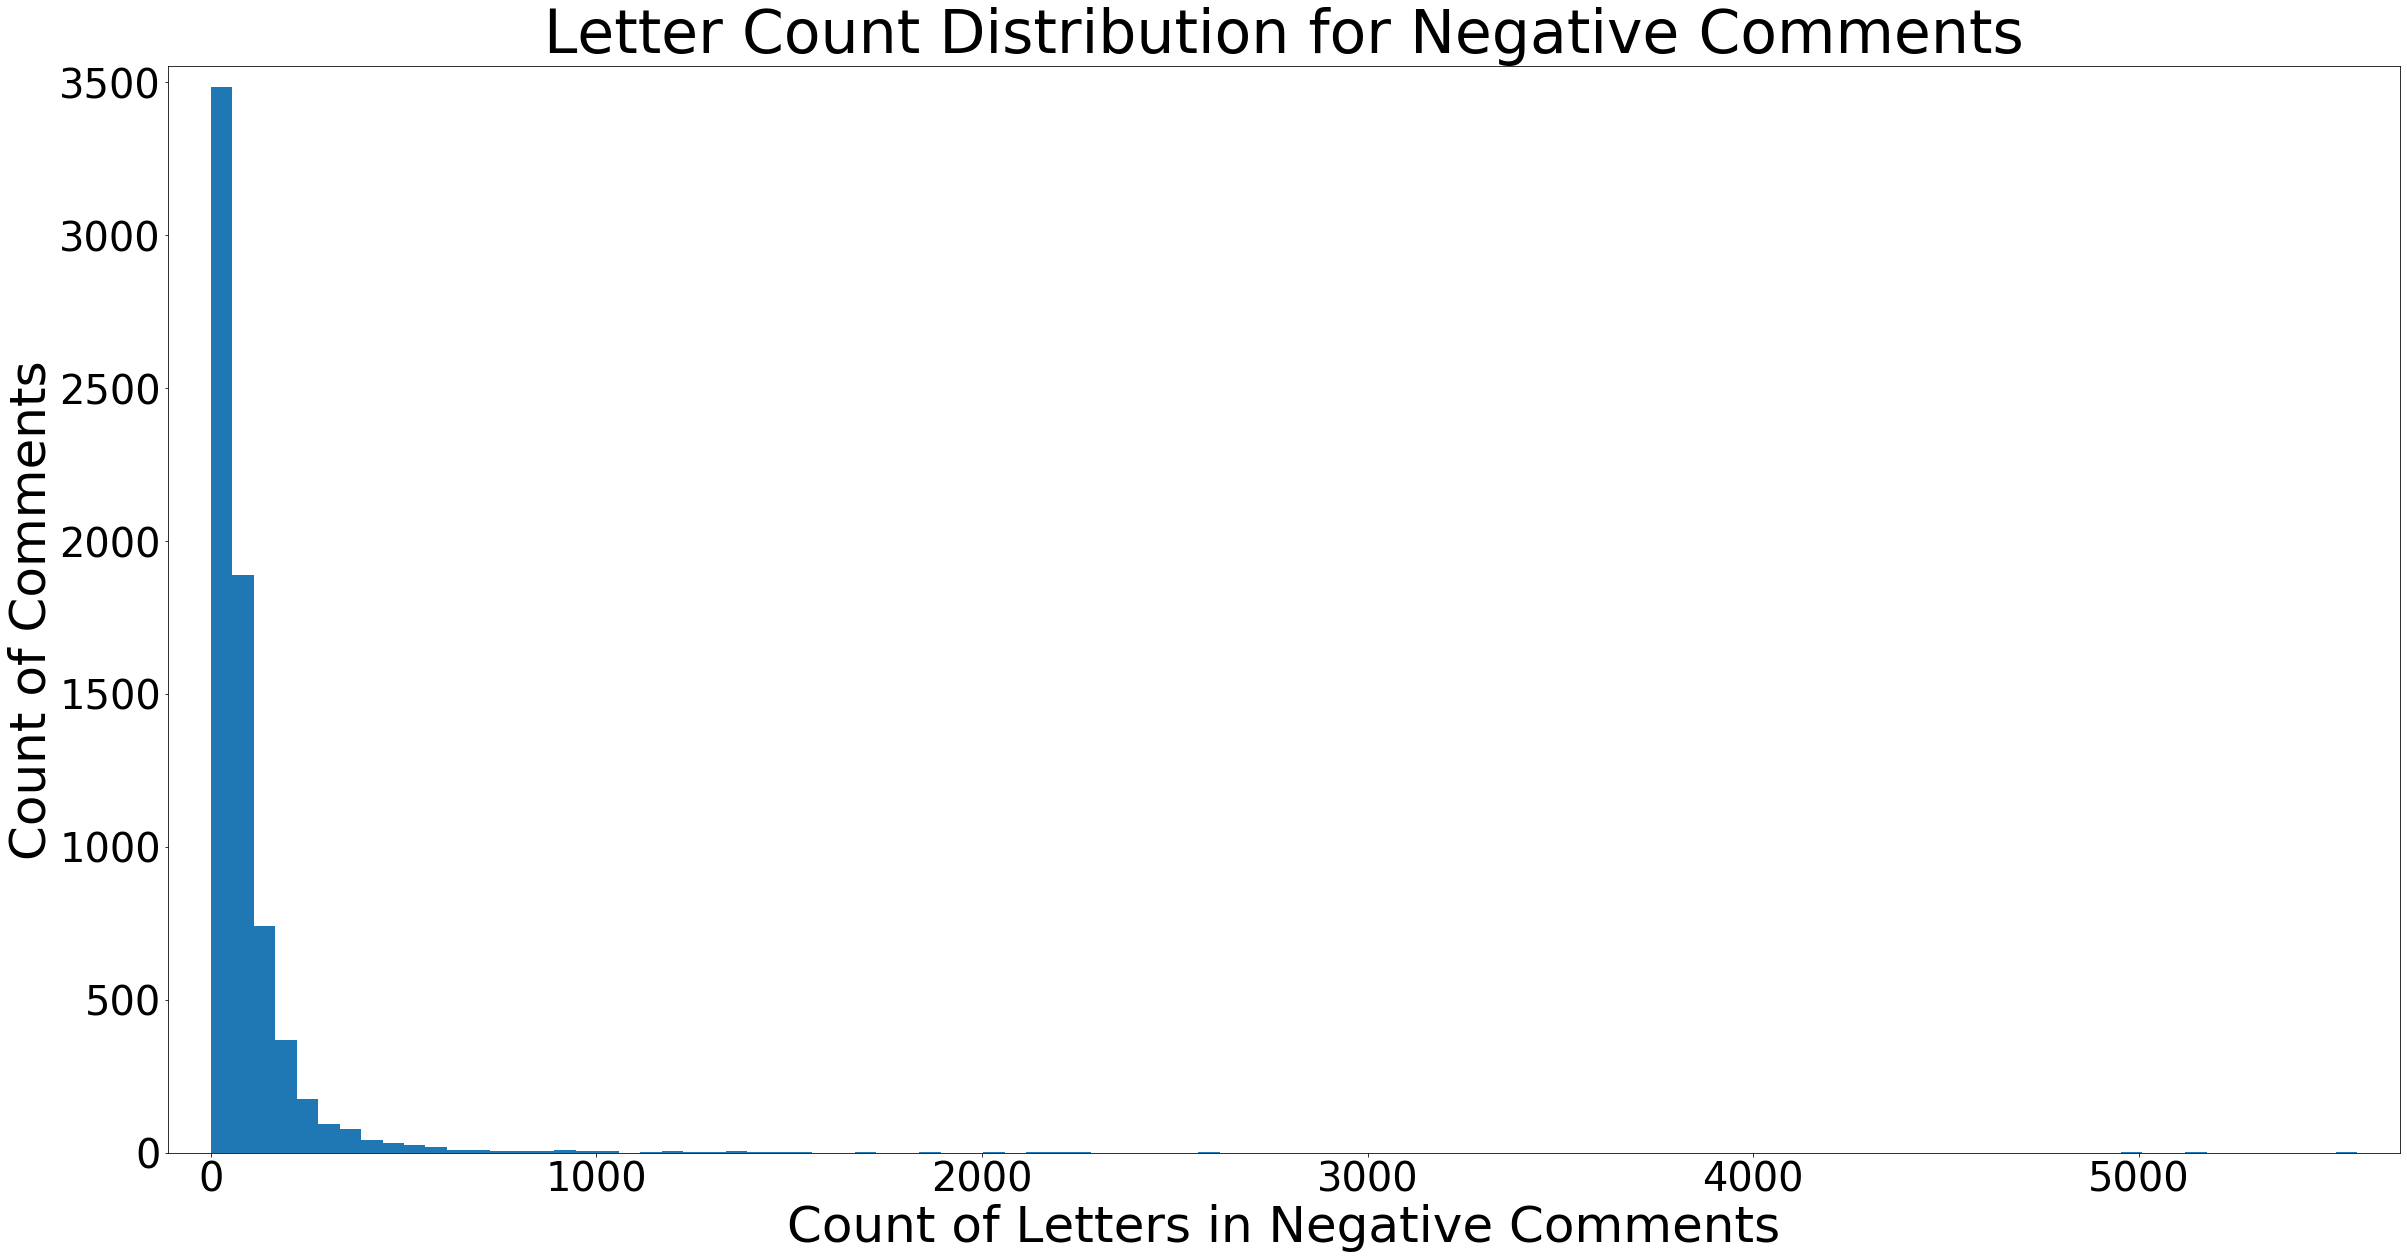

In [8]:
# negative comments
plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.xlabel('Count of Letters in Negative Comments', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Count of Comments', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(jp_df.query('label == 1')['comments_len'], bins=100)
plt.title('Letter Count Distribution for Negative Comments', fontsize=60)
plt.show()


In [9]:
jp_df.groupby('label')['comments_len'].mean().reset_index().rename(columns = {'comments_len': 'avg_comments_len'})


label  avg_comments_len
0      0         66.005517
1      1         98.452066

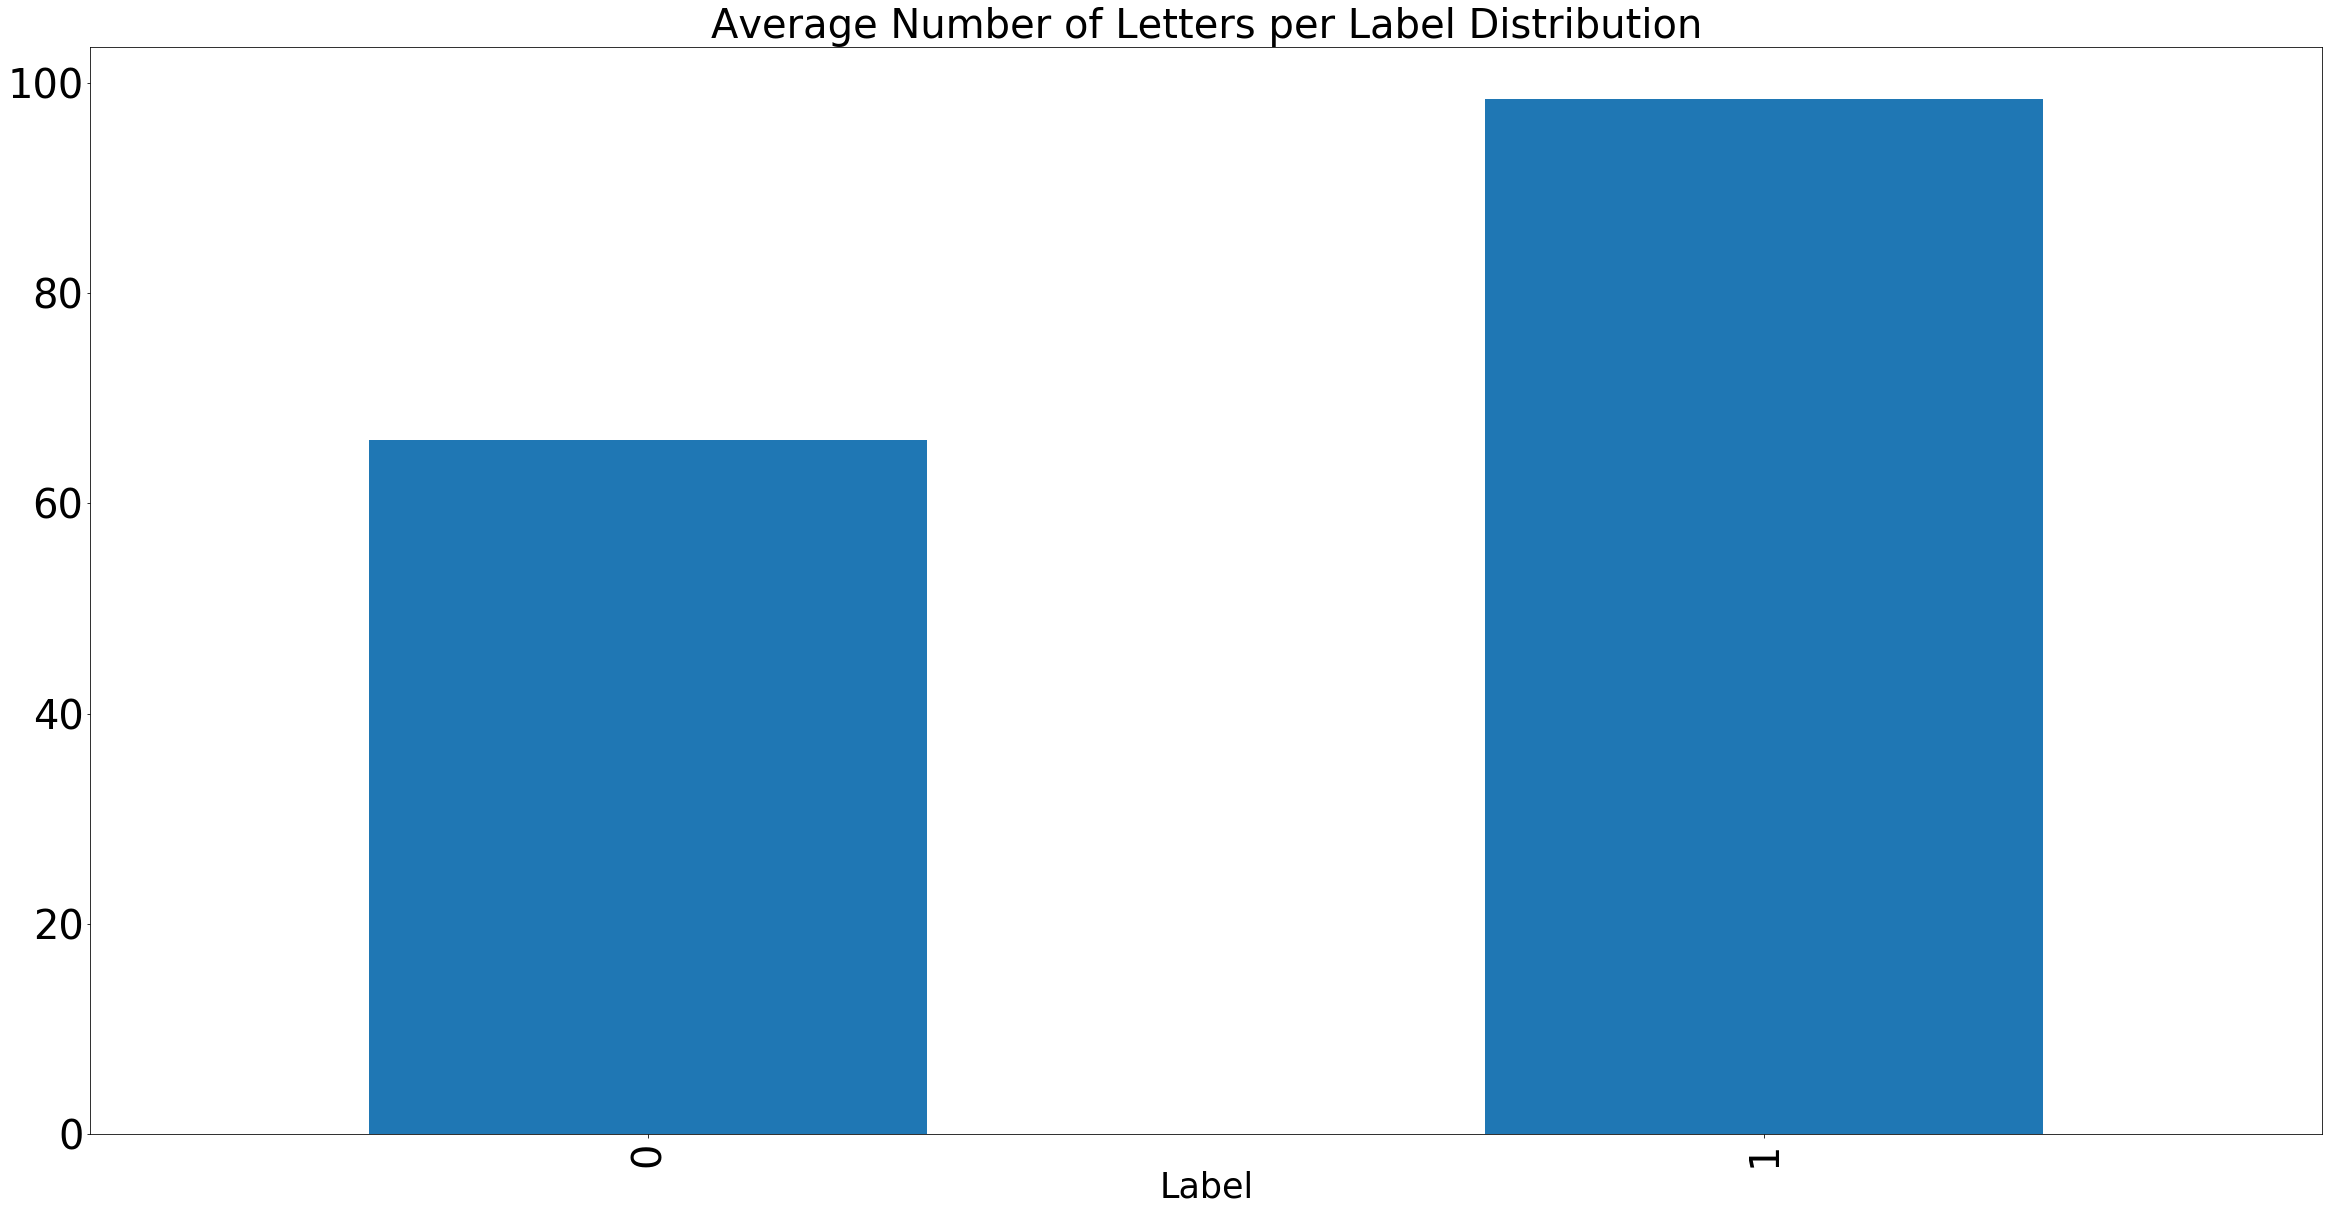

In [11]:
letter_avg = jp_df.groupby('label')['comments_len'].mean().plot(kind='bar', figsize=(40,20))
plt.xlabel('Label', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Label Distribution', fontsize=40)
plt.show()


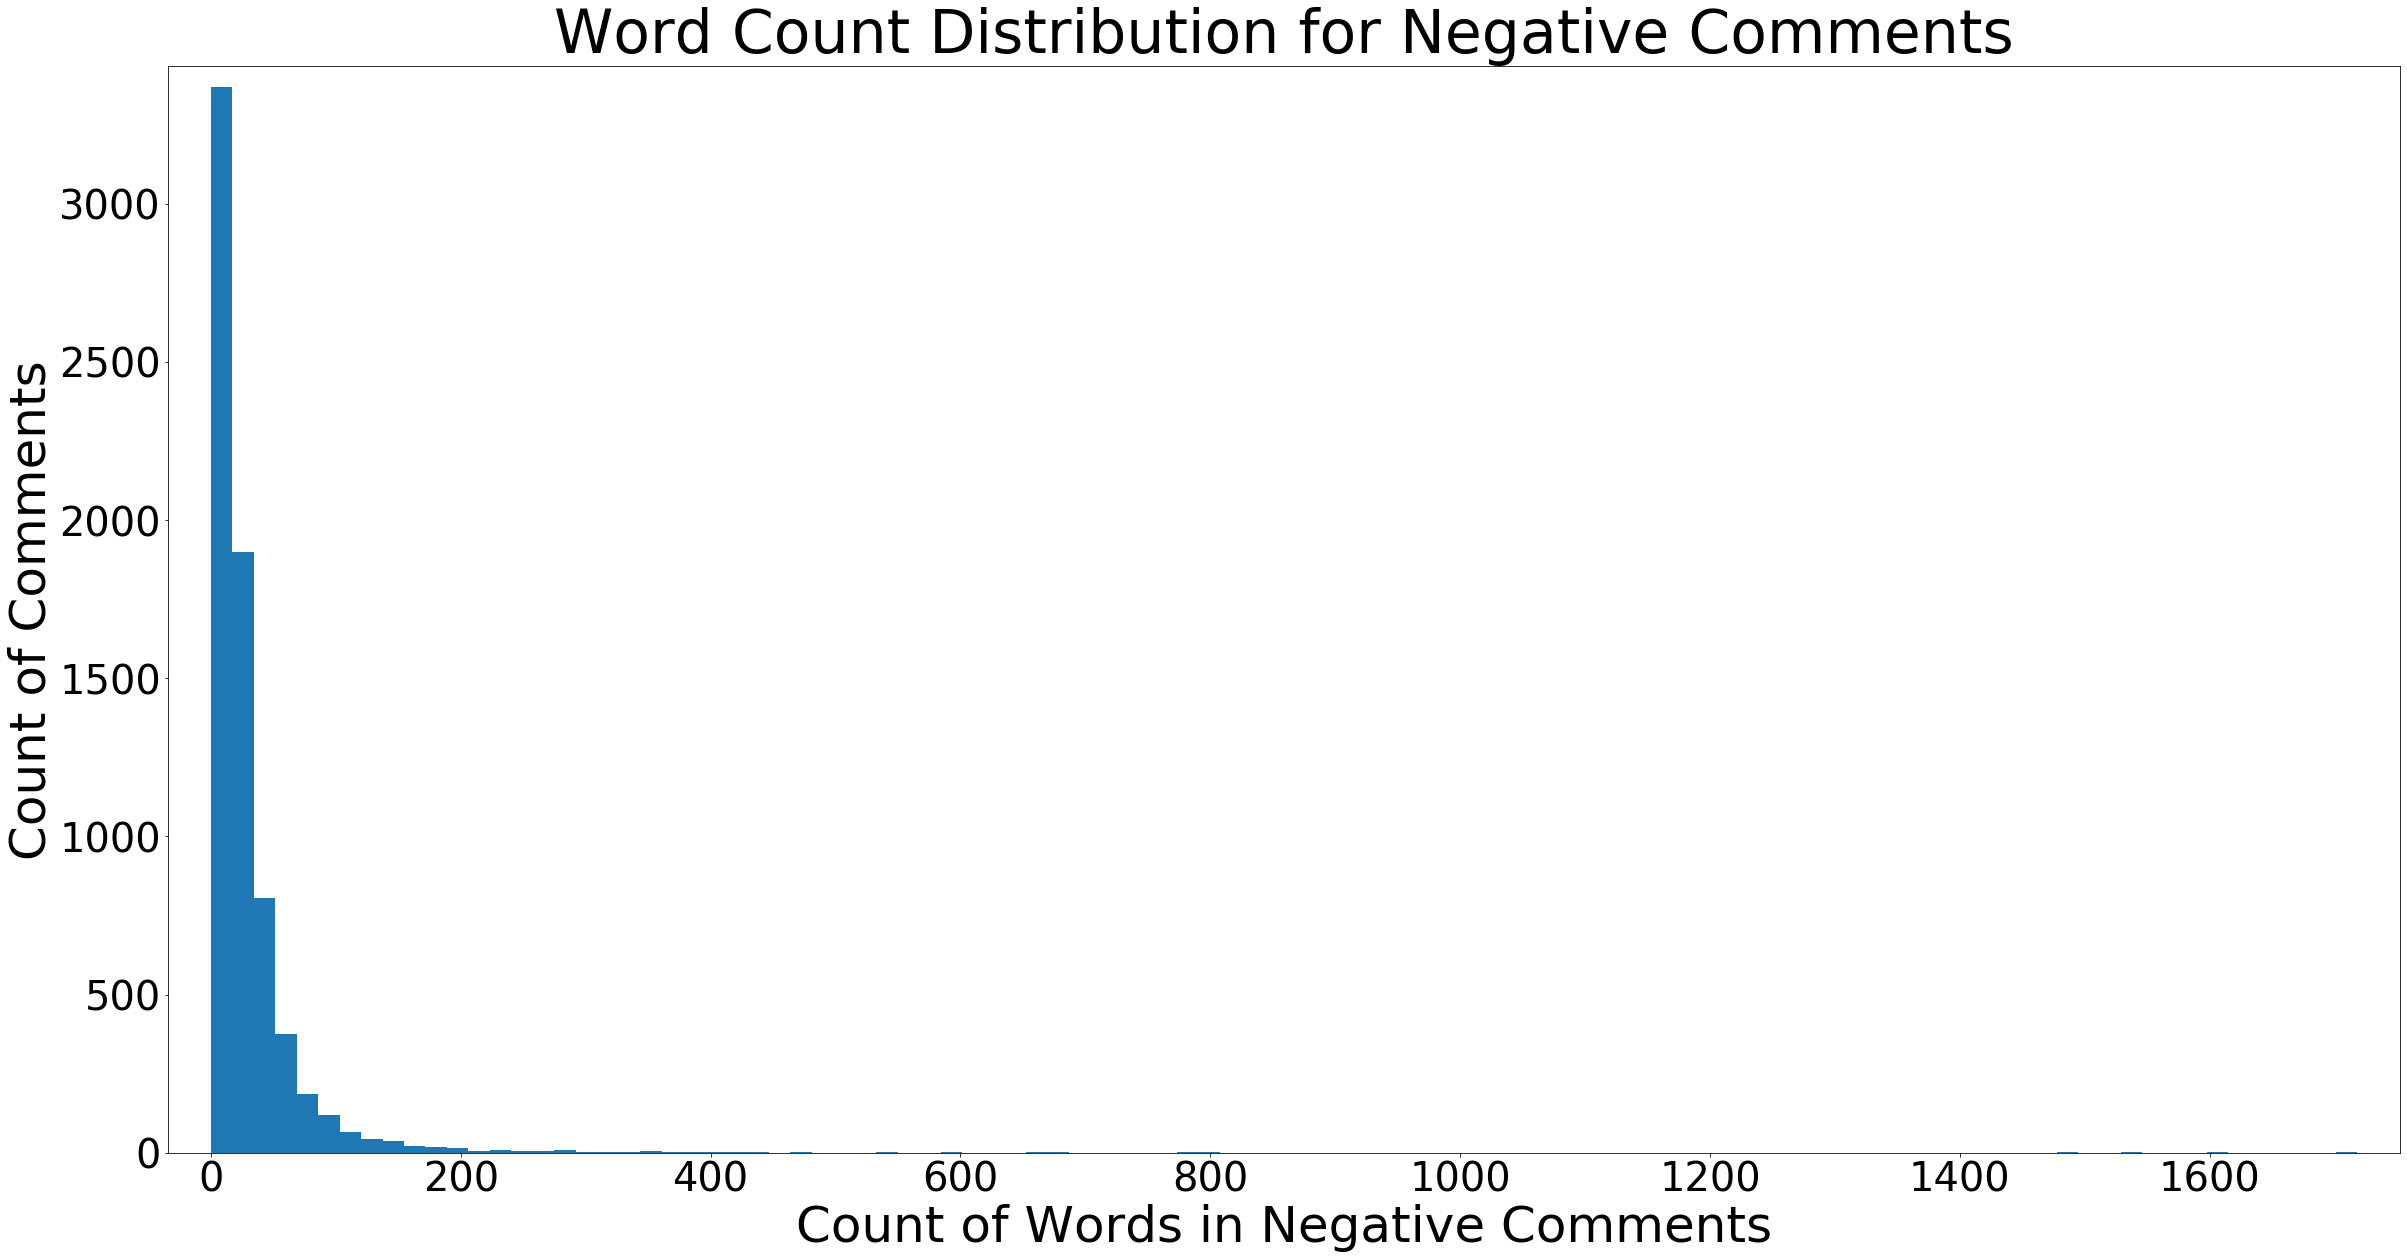

In [12]:
# for negative comments
plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.xlabel('Count of Words in Negative Comments', fontsize=50)
plt.ylabel('Count of Comments', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.hist(jp_df.query('label == 1')['word_count'], bins=100)
plt.title('Word Count Distribution for Negative Comments', fontsize=60)
plt.show()

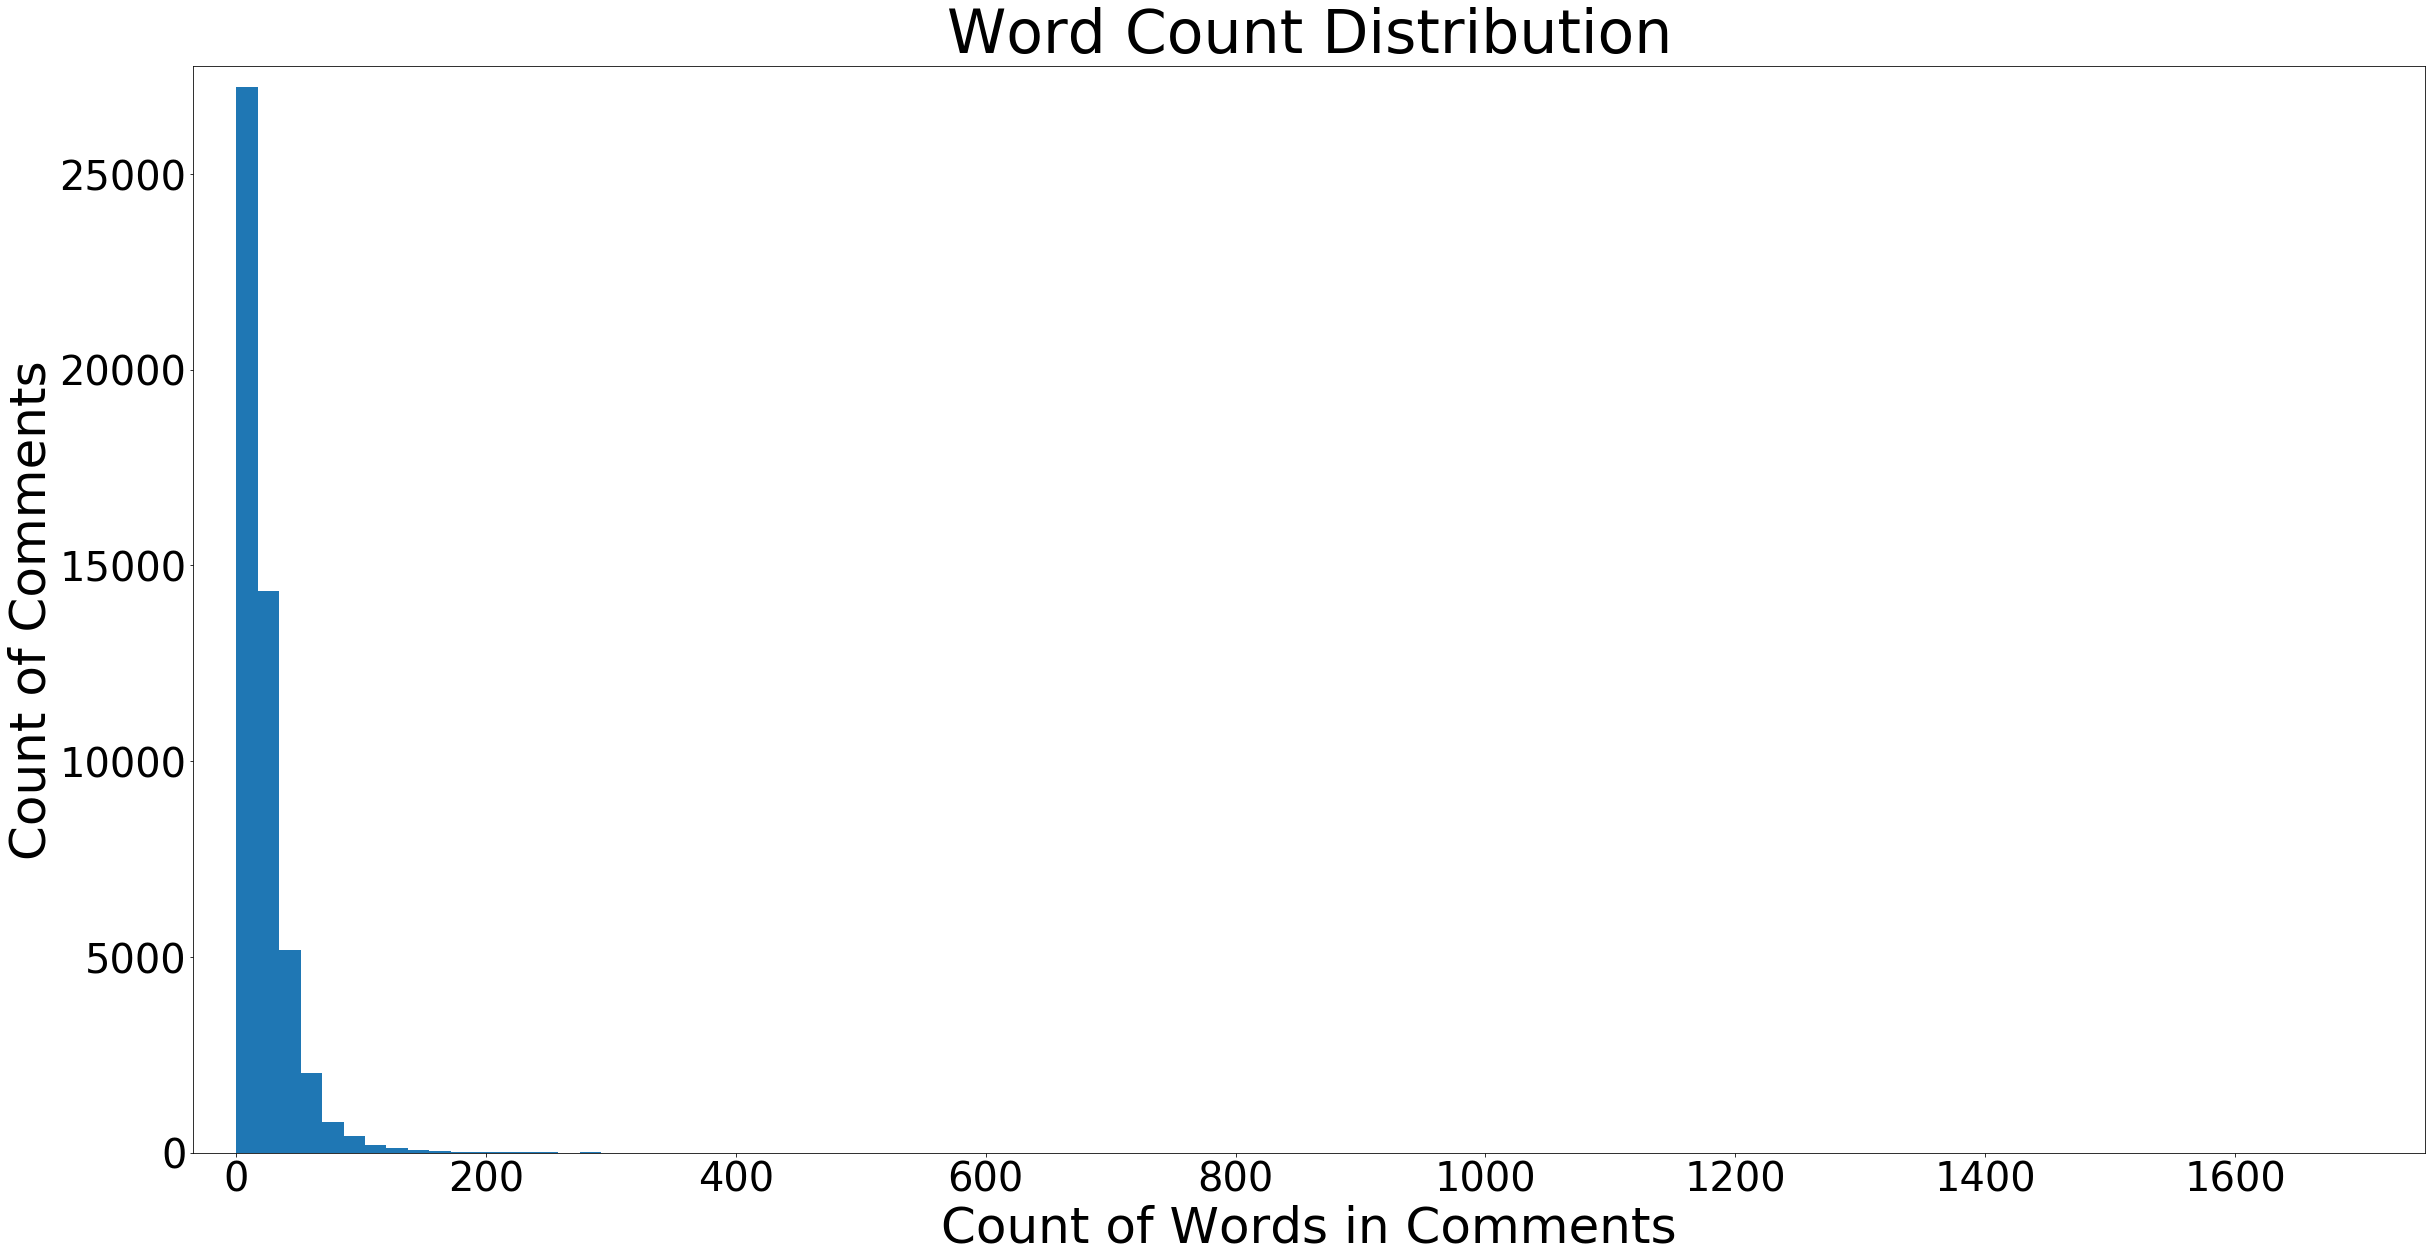

In [13]:
plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.xlabel('Count of Words in Comments', fontsize=50)
plt.ylabel('Count of Comments', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.hist(jp_df['word_count'], bins=100)
plt.title('Word Count Distribution', fontsize=60)
plt.show()


In [14]:
# avg word count
jp_df.groupby('label')['word_count'].mean().reset_index().rename(columns = {'word_count': 'avg_word_count'})


label  avg_word_count
0      0       21.173712
1      1       31.447806

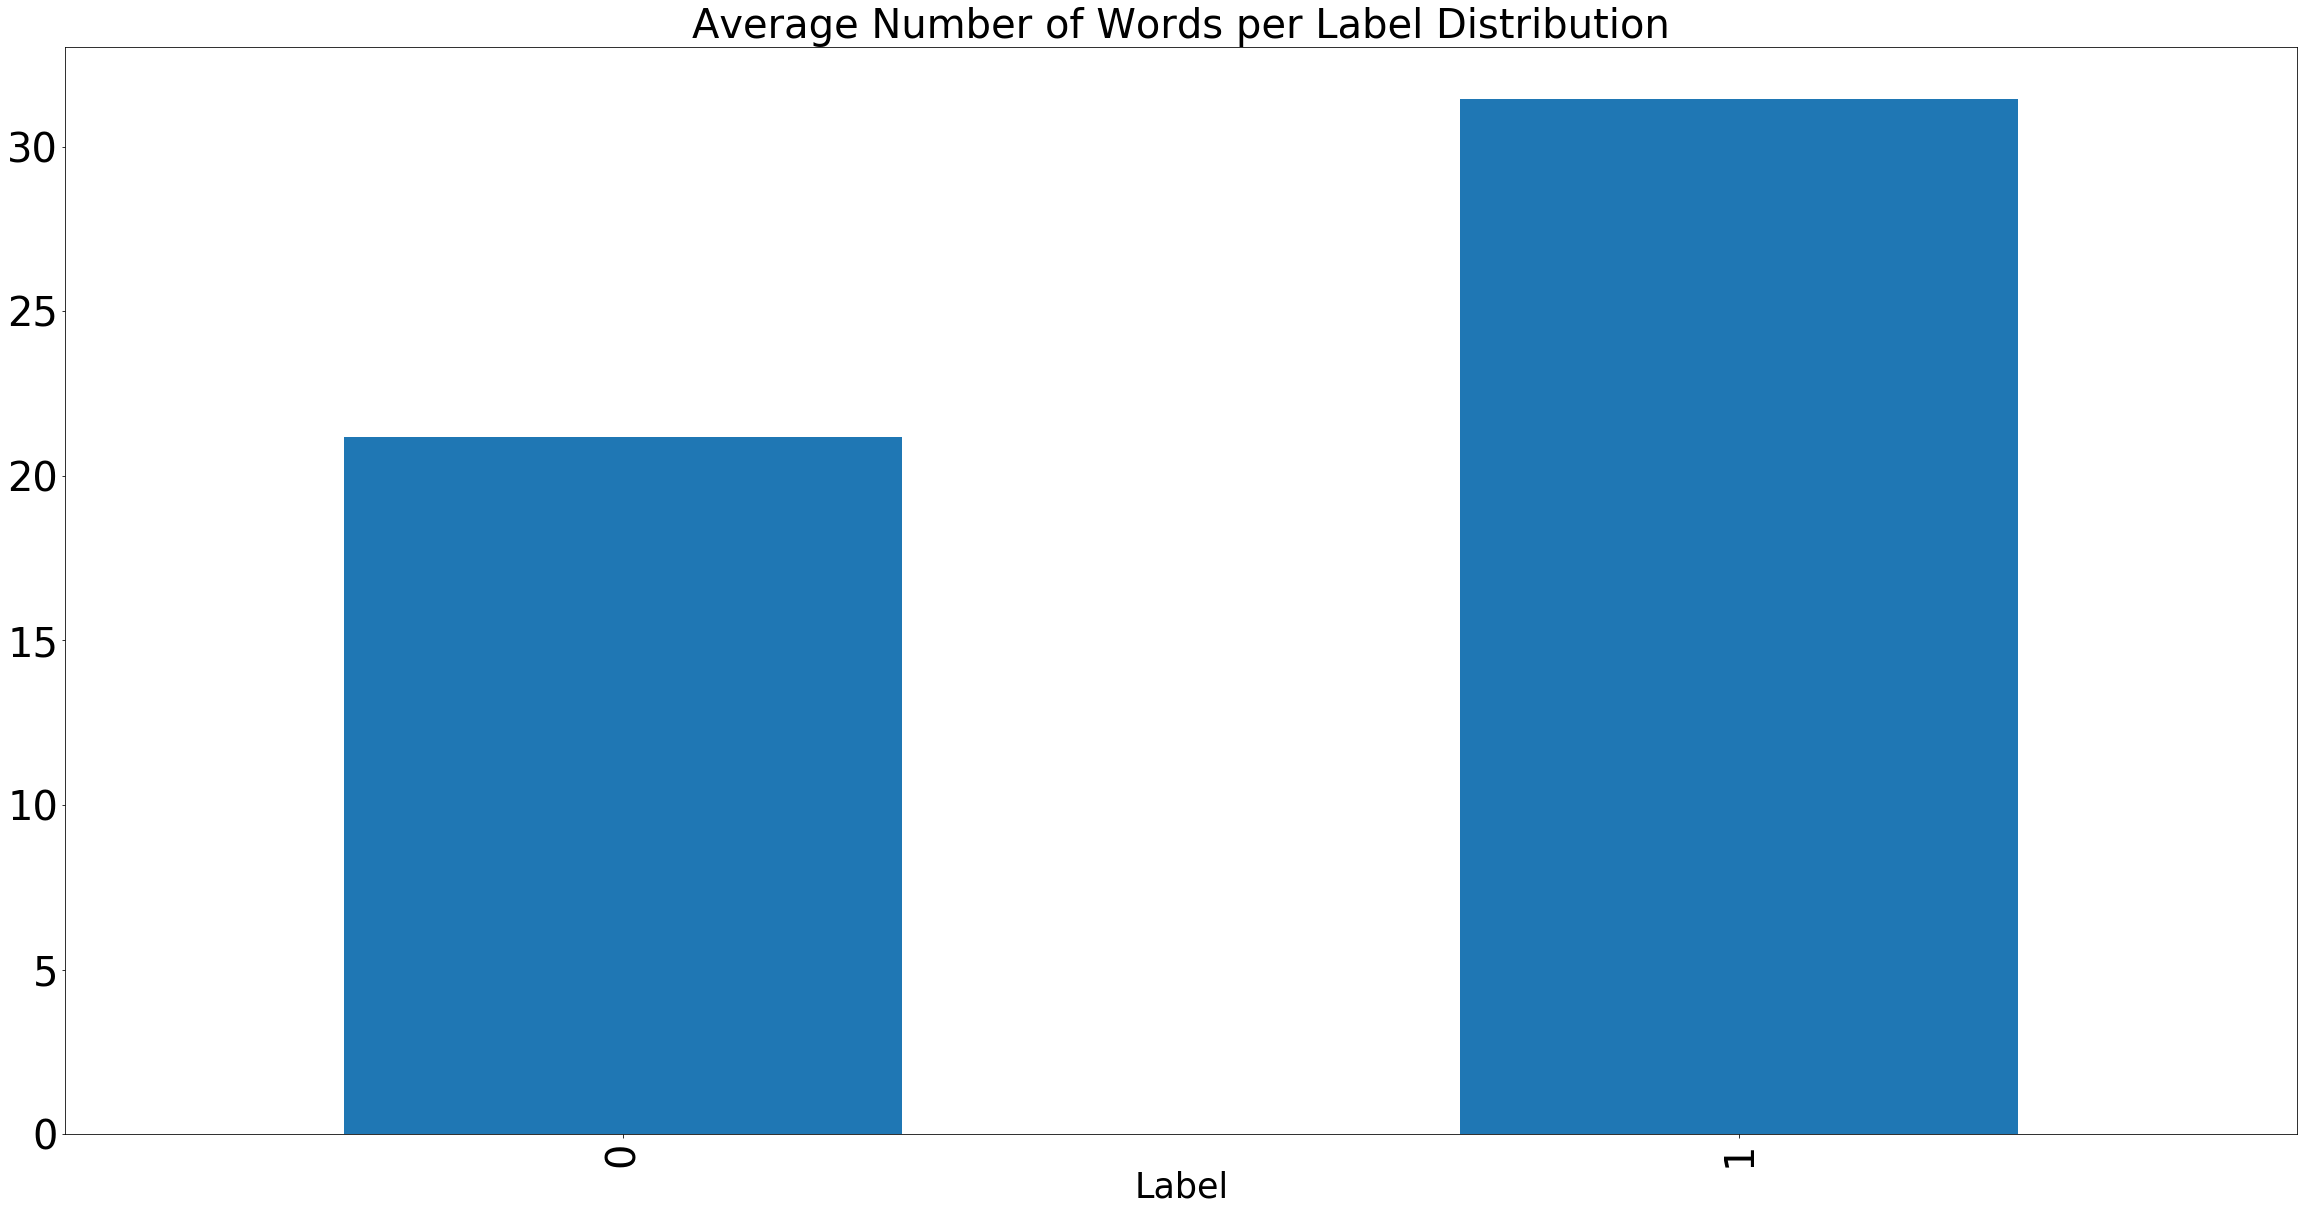

In [15]:

word_avg = jp_df.groupby('label')['word_count'].mean().plot(kind='bar', figsize=(40,20))
plt.xlabel('Label', fontsize=35)
# plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Label Distribution', fontsize=40)
plt.show()


### Label Distribution for English Comments
0: Positive

1: Negative


### Word Frequencies


#### Japanese Comments - Word Cloud

In [16]:
stop_words_jp = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \

'くれる', 'やる', 'くださる', 'そう', 'せる', 'した', '思う', \

'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \

'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '', 'れ','さ','なっ', 'br', '使用','あり','使え', '使っ','時',\
'なく','使い', 'いう','しまい','とても','事','少し','おり','つい','出来','入っ','どう','無い','み','中','あっ',\
'音','き','一 度','二 度','最初','しまっ','為','他','見','今','説明','しれ','上','注文','人',\
'付い','前','書い','しまう','ください','初めて','なかっ','表示','必要','カバー','全然','よく',\
'欲しい','手','外れ','ただ','入れ','中古','ちょっと','しっかり','一','とき']

In [17]:

def create_wordcloud_jp(text):
    global stop_words_jp
    fpath = Path(mpl.get_data_path(), "fonts/ttf/yumin.ttf")
    plt.figure(figsize = (9, 9), facecolor = None)
    wordcloud = WordCloud(background_color="white", width = 1000, height = 1000, font_path=str(fpath),
                          stopwords=set(stop_words_jp)).generate(text)
    plt.imshow(wordcloud)
#     wordcloud.to_file('word cloud for jp.png')

In [18]:
jp_df.head()

tokenized  \
0                                                         最悪 商品 購入 一 週間 たた 発火 し   
1                                                                       使用 発火 し   
2                                                             USB コネクター 部分 発火 し   
3  ブレーカー 落とし 電球 交換 し スイッチ 入れ 爆発 し めちゃくちゃ 怖かっ 後 冷え 外し 元々 点け い 電球 取り付け 普通 経験 はじめて   
5    車載 充電 し 使用 し い 運転 発火 し たまたま 止まっ い 問題 なかっ 動い いる 時 あれ 事故 つながっ い br 返金 し いただき   

   label  init_totalwords  comments_len  word_count  
0      1               32            21           8  
1      1               10             7           3  
2      1               19            17           5  
3      1              112            76          22  
5      1               95            74          25

In [19]:
jp_text = " ".join(review for review in jp_df.tokenized) 
jp_text_neg = " ".join(review for review in jp_df.query('label == 1').tokenized)

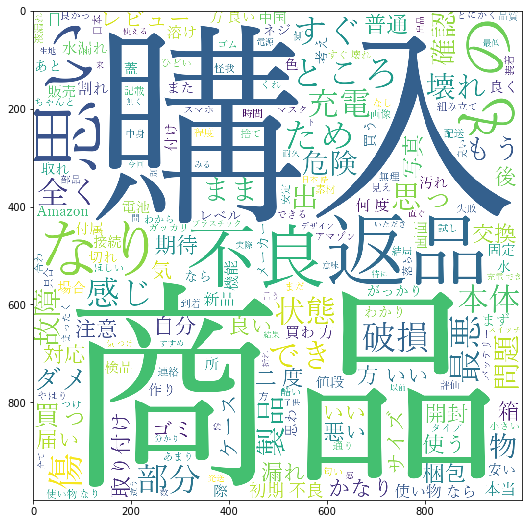

In [20]:
#
create_wordcloud_jp(jp_text)

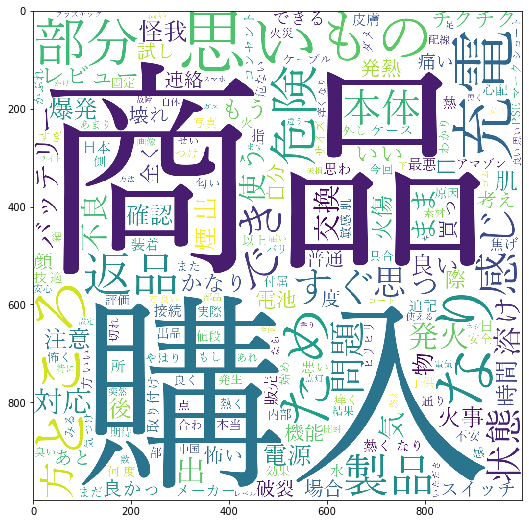

In [21]:
#
create_wordcloud_jp(jp_text_neg)

#### Japanese Comments - Word Count

In [27]:
# Top 20 most common words
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=str(Path(mpl.get_data_path(), "fonts/ttf/yumin.ttf")))  # speicify font
wordcount = WordCloud(background_color="white", width=1800, height=1000, stopwords=set(stop_words_jp)).process_text(jp_text_neg)
pd.DataFrame(data = wordcount.values(), index=wordcount.keys()).sort_values(by=0, ascending=False).iloc[:20,].reset_index()


index     0
0     商品  1285
1     購入  1040
2     思い   977
3     なり   914
4     充電   835
5    ところ   754
6     ため   753
7     もの   679
8     部分   678
9     危険   629
10    でき   621
11    返品   568
12    製品   508
13    感じ   507
14    すぐ   426
15    本体   421
16    状態   393
17     方   390
18    問題   369
19    思っ   361

In [23]:
def plot_wordcount_jp(text):
    import matplotlib.font_manager as fm
    font = fm.FontProperties(fname=str(Path(mpl.get_data_path(), "fonts/ttf/yumin.ttf")))  # speicify font
    wordcount = WordCloud(background_color="white", width=1800, height=1000, stopwords=set(stop_words_jp)).process_text(text)
    df_top20 = pd.DataFrame(data = wordcount.values(), index=wordcount.keys()).sort_values(by=0, ascending=False).iloc[:20,].reset_index()
    ax = df_top20.plot(x = 'index', y = 0, kind = 'bar', figsize = (9, 9), fontsize = 22, legend = False)
    ax.set_xticklabels(df_top20['index'], fontproperties=font, fontdict = {'fontsize': 22})
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    plt.show()


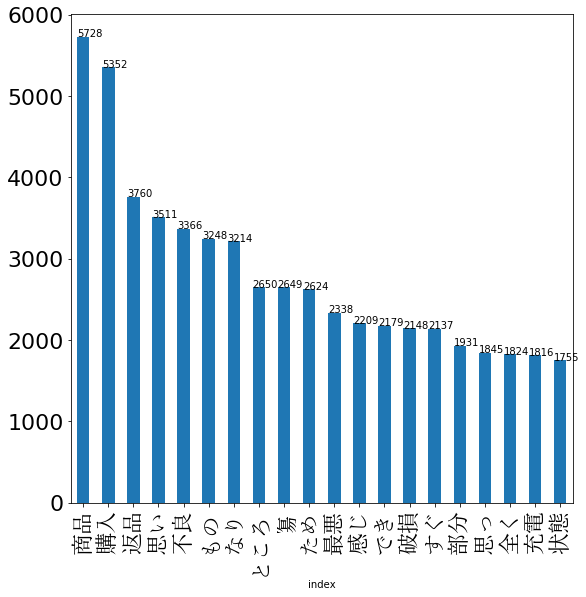

In [24]:
# word count for jp comments
plot_wordcount_jp(jp_text)

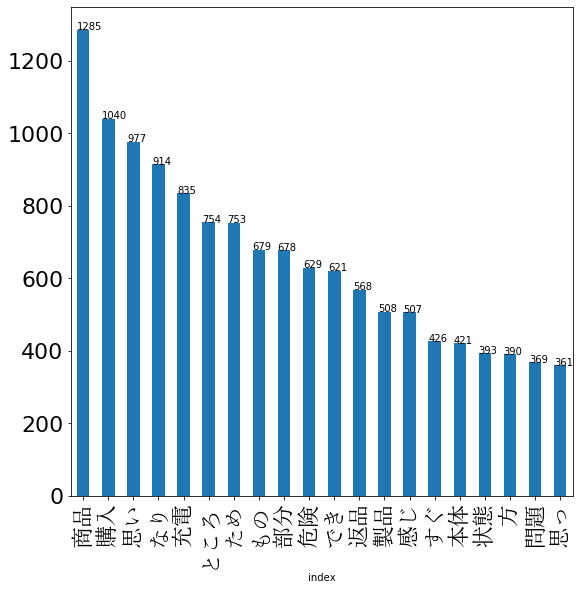

In [25]:
# word count for negative jp comments
plot_wordcount_jp(jp_text_neg)